In [22]:
import os
import re
import pickle

import numpy as np
import matplotlib.pyplot as plt

from coffea import hist

from samples import signal_samples
from helpers import files_from_dir, files_from_dirs
#from exp_limits import exp_limits_mu

from HNLAnalysis import HNLAnalysis

In [23]:
# Read in reults from coffea run
#tag = 'bck_WZ_ZZ_TT_tighter_sel_electron'
tag1 = 'presentation_220307_signal_loose_sel_e'
tag2 = 'presentation_220307_signal_tighter_sel_e'


with open(f'result_{tag1}.pkl', 'rb') as f:
    result1 = pickle.load(f)
with open (f'counter_{tag1}.pkl', 'rb') as f:
    event_counter1 = pickle.load(f)


with open(f'result_{tag2}.pkl', 'rb') as f:
    result2 = pickle.load(f)
with open (f'counter_{tag2}.pkl', 'rb') as f:
    event_counter2 = pickle.load(f)


In [24]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false
}

<IPython.core.display.Javascript object>

In [25]:
# Lumi and cross sections for plotting
xsecs = { # pb
    'HNL100':1.,
    'HNL500':1.,
    'HNL1000':1.,
    'HNL100_sing':1.,
    'HNL500_sing':1.,
    'HNL1000_sing':1.,
    'HNL100_2highest':1.,
    'HNL500_2highest':1.,
    'HNL1000_2highest':1.,
    'HNL100_+missingpT':1.,
    'HNL500_+missingpT':1.,
    'HNL1000_+missingpT':1.,
    'ZZ':0.0349,


    # https://twiki.cern.ch/twiki/bin/viewauth/CMS/StandardModelCrossSectionsat13TeV
    'DY':6077.22,
    'WZ':0.1427,
    'tt2l2nu':87.315,
    'W':20508.9*3.,
    'Data':1.,
}

lumi = 60000. # pb-1
plot_scale = {
    'HNL100':1.,
    'HNL500':1./16,
    'HNL1000':1./16,
    'HNL100_sing':1.,
    'HNL500_sing':1./16,
    'HNL1000_sing':1./16,
    'HNL100_2highest':1.,
    'HNL500_2highest':1./16,
    'HNL1000_2highest':1./16,
    'HNL100_+missingpT':1.,
    'HNL500_+missingpT':1./16,
    'HNL1000_+missingpT':1./16,
    'ZZ':1./2,
    'DY':1.,
    'WZ':1.,
    'tt2l2nu':1./10000,
    'W':1.,
    'Data':1.,
}

event_counter1['sumw']['Data'] = lumi
event_counter2['sumw']['Data'] = lumi

# A bit hacky treatment of same-sign, more elegant way well possible...
for k, v in list(xsecs.items()):
    if not 'HNL' in k:
        xsecs[k+'SS'] = v
for k, v in list(plot_scale.items()):
    if not 'HNL' in k and not k+'SS' in plot_scale:
        plot_scale[k+'SS'] = v
for k, v in list(xsecs.items()):
    if 'Data' in k:
        event_counter1['sumw'][k] = lumi
        event_counter2['sumw'][k] = lumi

    elif k.endswith('SS'):
        event_counter1['sumw'][k] = event_counter1['sumw'][k[:-2]]
        event_counter2['sumw'][k] = event_counter2['sumw'][k[:-2]]

        

Showing pt_tau_1


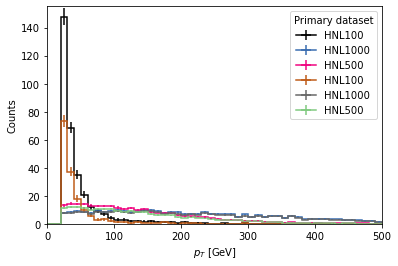

   
Showing eta_tau_1


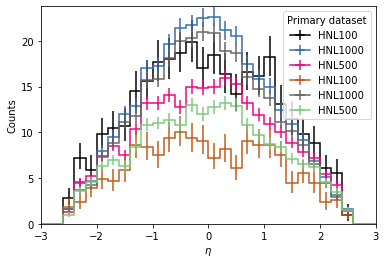

   
Showing phi_tau_1


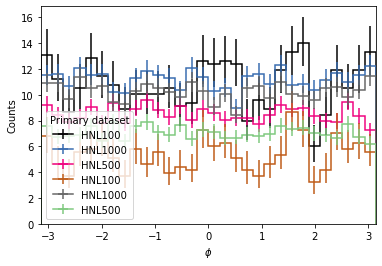

   
Showing charge_tau_1


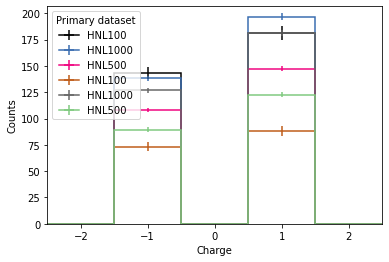

   
Showing pt_tau_2


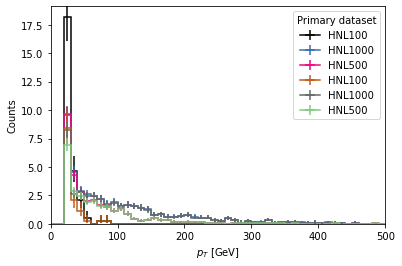

   
Showing eta_tau_2


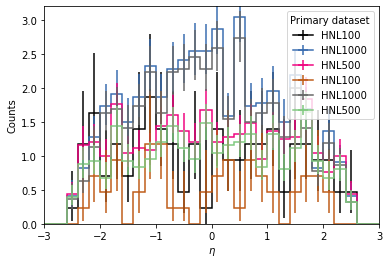

   
Showing phi_tau_2


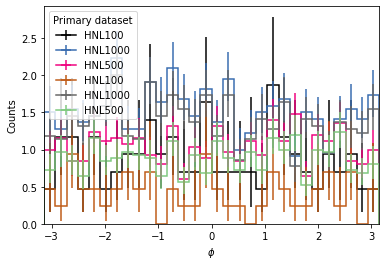

   
Showing charge_tau_2


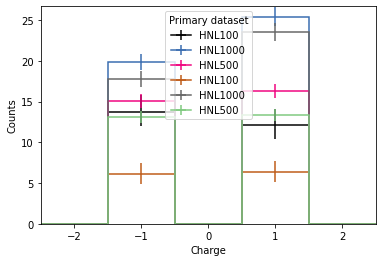

   
Showing pt_mu_1


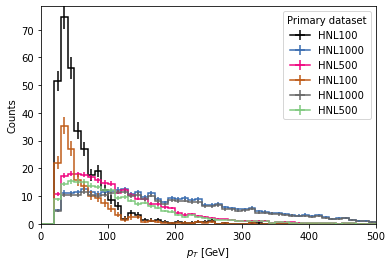

   
Showing eta_mu_1


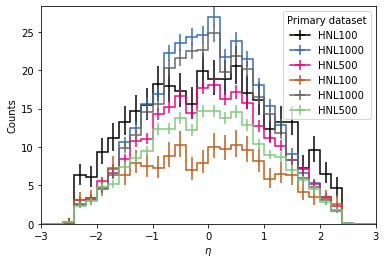

   
Showing phi_mu_1


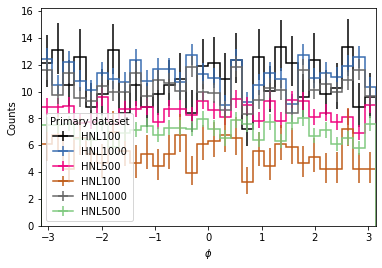

   
Showing charge_mu_1


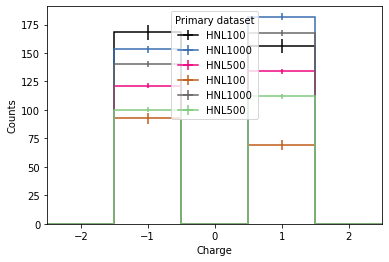

   
Showing pt_mu_2


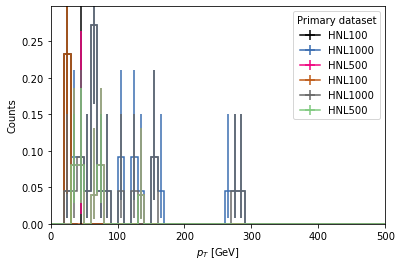

   
Showing eta_mu_2


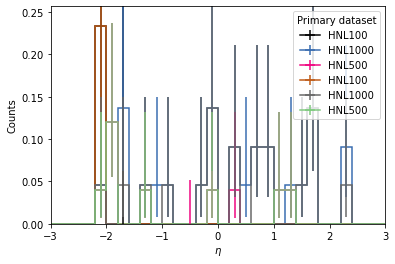

   
Showing phi_mu_2


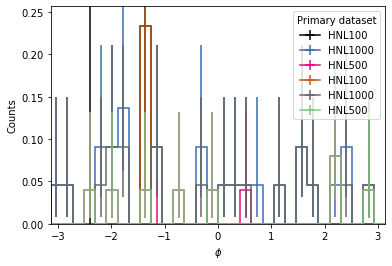

   
Showing charge_mu_2


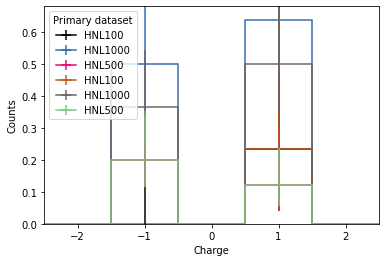

   
Showing pt_e_1


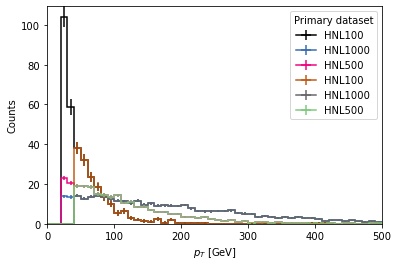

   
Showing eta_e_1


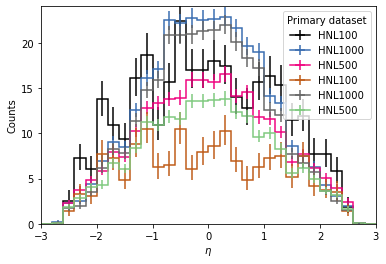

   
Showing phi_e_1


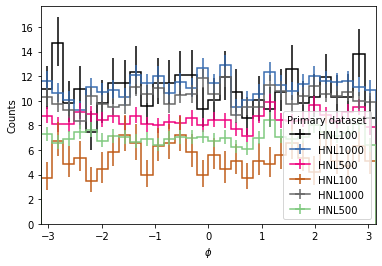

   
Showing charge_e_1


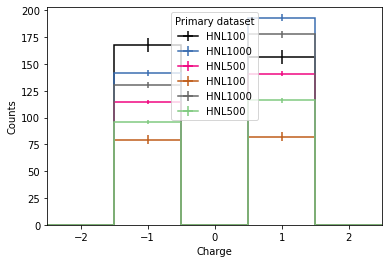

   
Showing pt_e_2


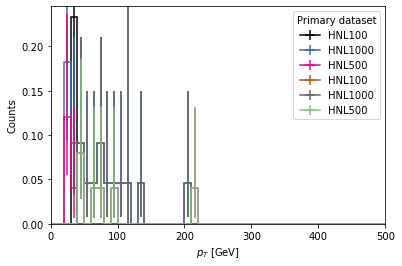

   
Showing eta_e_2


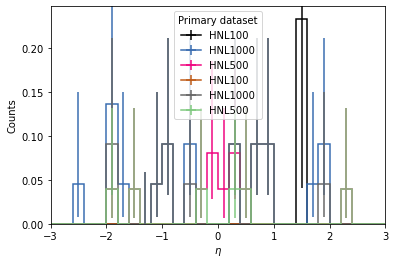

   
Showing phi_e_2


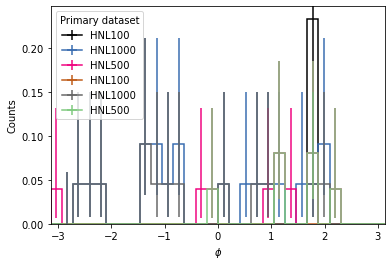

   
Showing charge_e_2


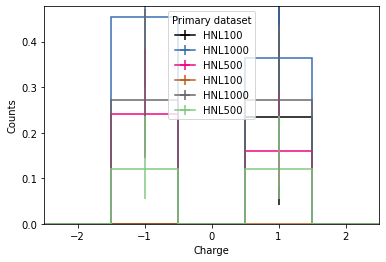

   
Showing m_e_tau


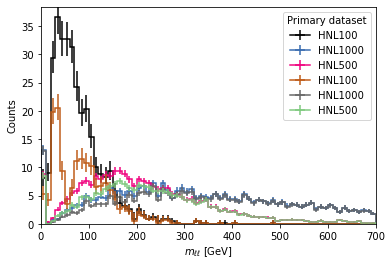

   
Showing m_mu_tau


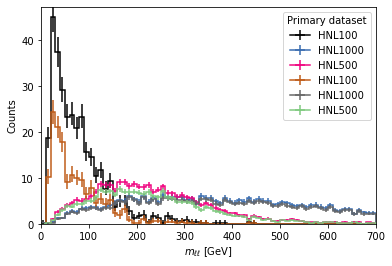

   
Showing m_e_mu


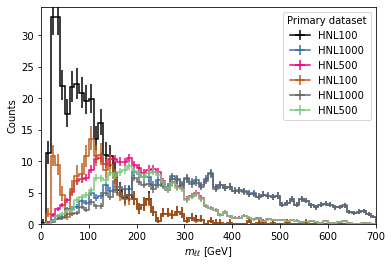

   
Showing dr_e_tau


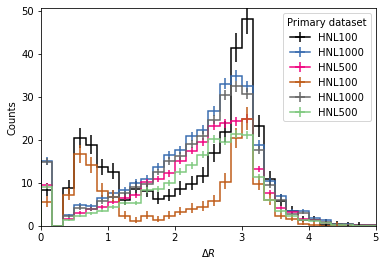

   
Showing dr_mu_tau


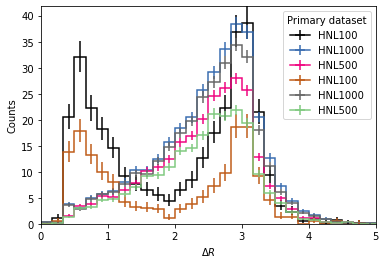

   
Showing dr_e_mu


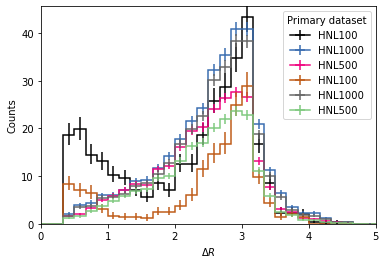

   
Showing m_e_mu_tau


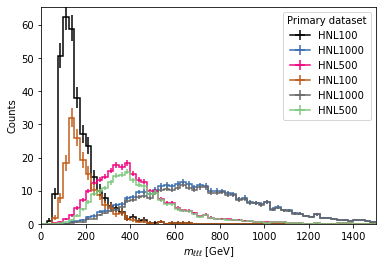

   
Showing pt_jet_1


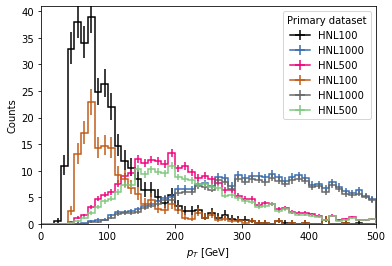

   
Showing pt_jet_2


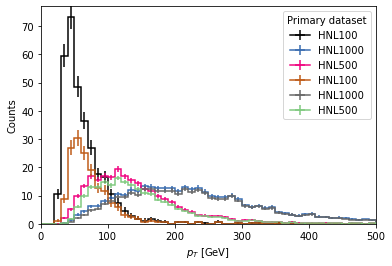

   
Showing m_HNL


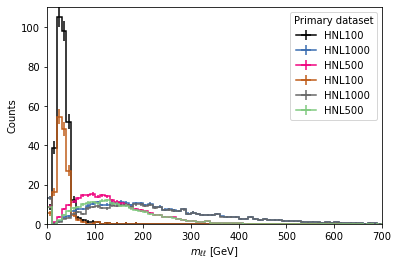

   
Showing m_HNL_2
m_HNL_2 empty
Showing missing_pt1


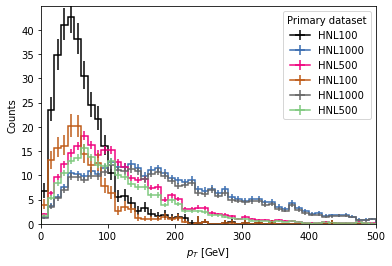

   
Showing missing_pt2


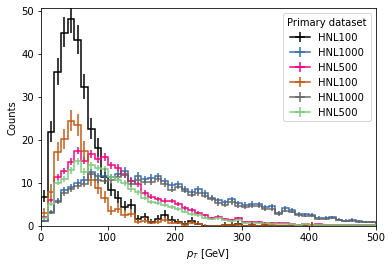

   
Showing missing_pt3


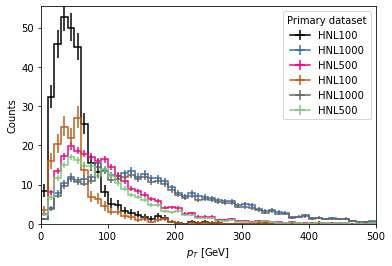

In [26]:

import re
import matplotlib as mpl
%matplotlib inline
from cycler import cycler
import warnings

not_hnl_data = re.compile('(?!HNL)(?!Data)^((?!SS).)*$')
hnl = re.compile('(HNL)')
# data = re.compile('(Data)((?!InvIso).)*$')
data = re.compile('^Data$|^DataSS$|^DataInvTimeSameBX$|^DataSSInvTimeSameBX$')

cols_bkg = ['#fde6f7', '#fafbc3', '#c4fbd6', '#b3e5f4']
cols_sig = ['black', '#386cb0','#f0027f','#bf5b17','#666666', '#7fc97f','#beaed4','#fdc086','#ffff99']
# cols_sig = ['red', 'green', 'blue','purple']
mpl.rcParams['axes.prop_cycle'] = cycler(color=cols_bkg)


for v in HNLAnalysis.get_var_axis_pairs():
   
    try:
        var = v[0]
        print('Showing', var)
        scales1 = {s:plot_scale[s]*lumi*xsecs[s]/event_counter1['sumw'][s] if event_counter1['sumw'][s] else 1. for s in xsecs.keys()}
        back_scales1 = {s:1./v for s, v in scales1.items()}
        result1[var].scale(scales1, axis='ds')


        scales2 = {s:plot_scale[s]*lumi*xsecs[s]/event_counter2['sumw'][s] if event_counter2['sumw'][s] else 1. for s in xsecs.keys()}
        back_scales2 = {s:1./v for s, v in scales2.items()}
        result2[var].scale(scales2, axis='ds')       

#         ax = hist.plot1d(result[var][not_hnl_data], stack=True, fill_opts={
#             'alpha': 1.0, 
#             'linewidths': 0.5,
#             'edgecolor': (0,0,0,0.5)
#             }
#         )
        
        if not len(result1[var].values()):
            print(v[0], 'empty')
            continue
#         max_y = max([max(a) for a in result[var].values().values()])
#         ax.set_ylim(top=1.2*max_y)

        plt.gca().set_prop_cycle(color=cols_sig)
#         hist.plot1d(result[var][hnl], clear=False)
        warnings.filterwarnings("ignore")
        ax = hist.plot1d(result1[var][hnl], clear=True)
        ax = hist.plot1d(result2[var], clear=True)
#         plt.gca().set_prop_cycle(color=cols_sig)
#         hist.plot1d(result[var][data], clear=False, error_opts={
# #         ax = hist.plot1d(result[var][data], clear=True, error_opts={
#     #     'linestyle': 'none',
#         'marker': '.',
#         'markersize': 10.,
#     #     'color': 'k',
#         'elinewidth': 1,
#     })
#         max_y = max([max(a) for a in result[var][data].values().values()])
#         ax.set_ylim(top=1.2*max_y)

        plt.show()
        print('   ')
        result1[var].scale(back_scales1, axis='ds') #Alternatively make a deepcopy for each round of plotting?
        result2[var].scale(back_scales2, axis='ds') #Alternatively make a deepcopy for each round of plotting?

        warnings.filterwarnings("default")
    except AssertionError:
        pass

